# IPCV - Uebung 8
## Author: Fabian Meyer
## 1. Evolution einer Snake

(-0.5, 767.5, 1023.5, -0.5)

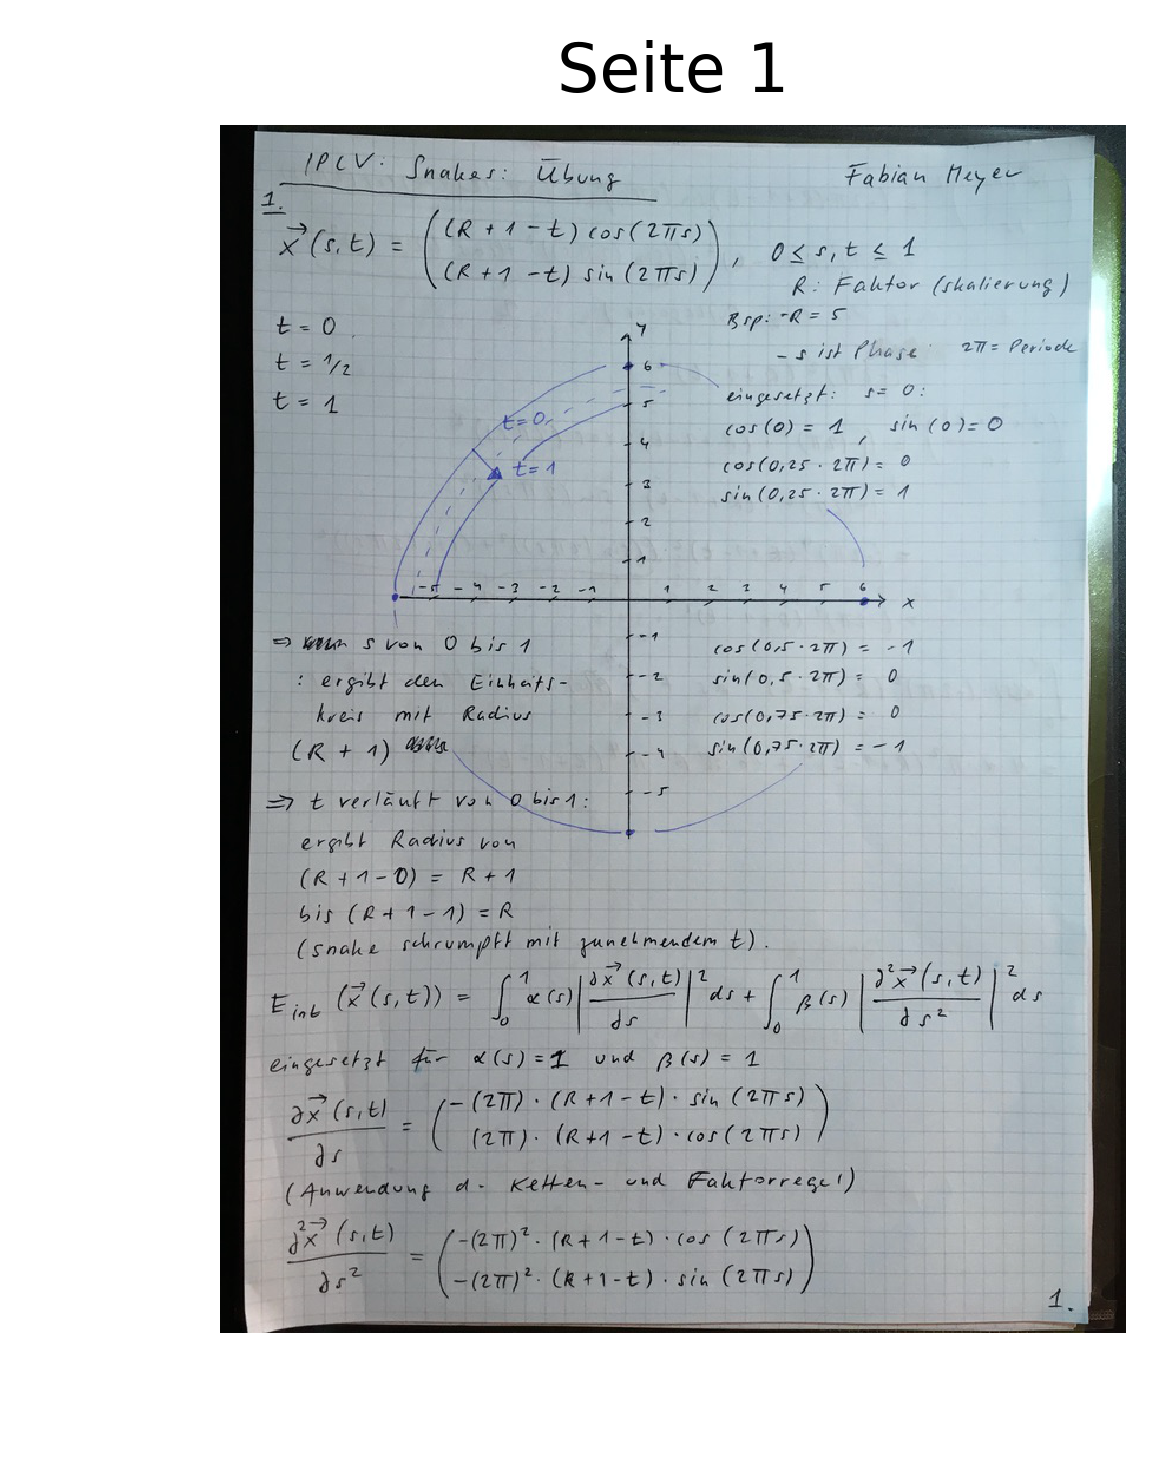

In [12]:
mpl.rcParams['figure.dpi']= 400
evo1 = cv2.imread('evolutioneinersnake1.jpg')
plt.imshow(evo1)
plt.title('Seite 1')
plt.axis('off')

(-0.5, 767.5, 1023.5, -0.5)

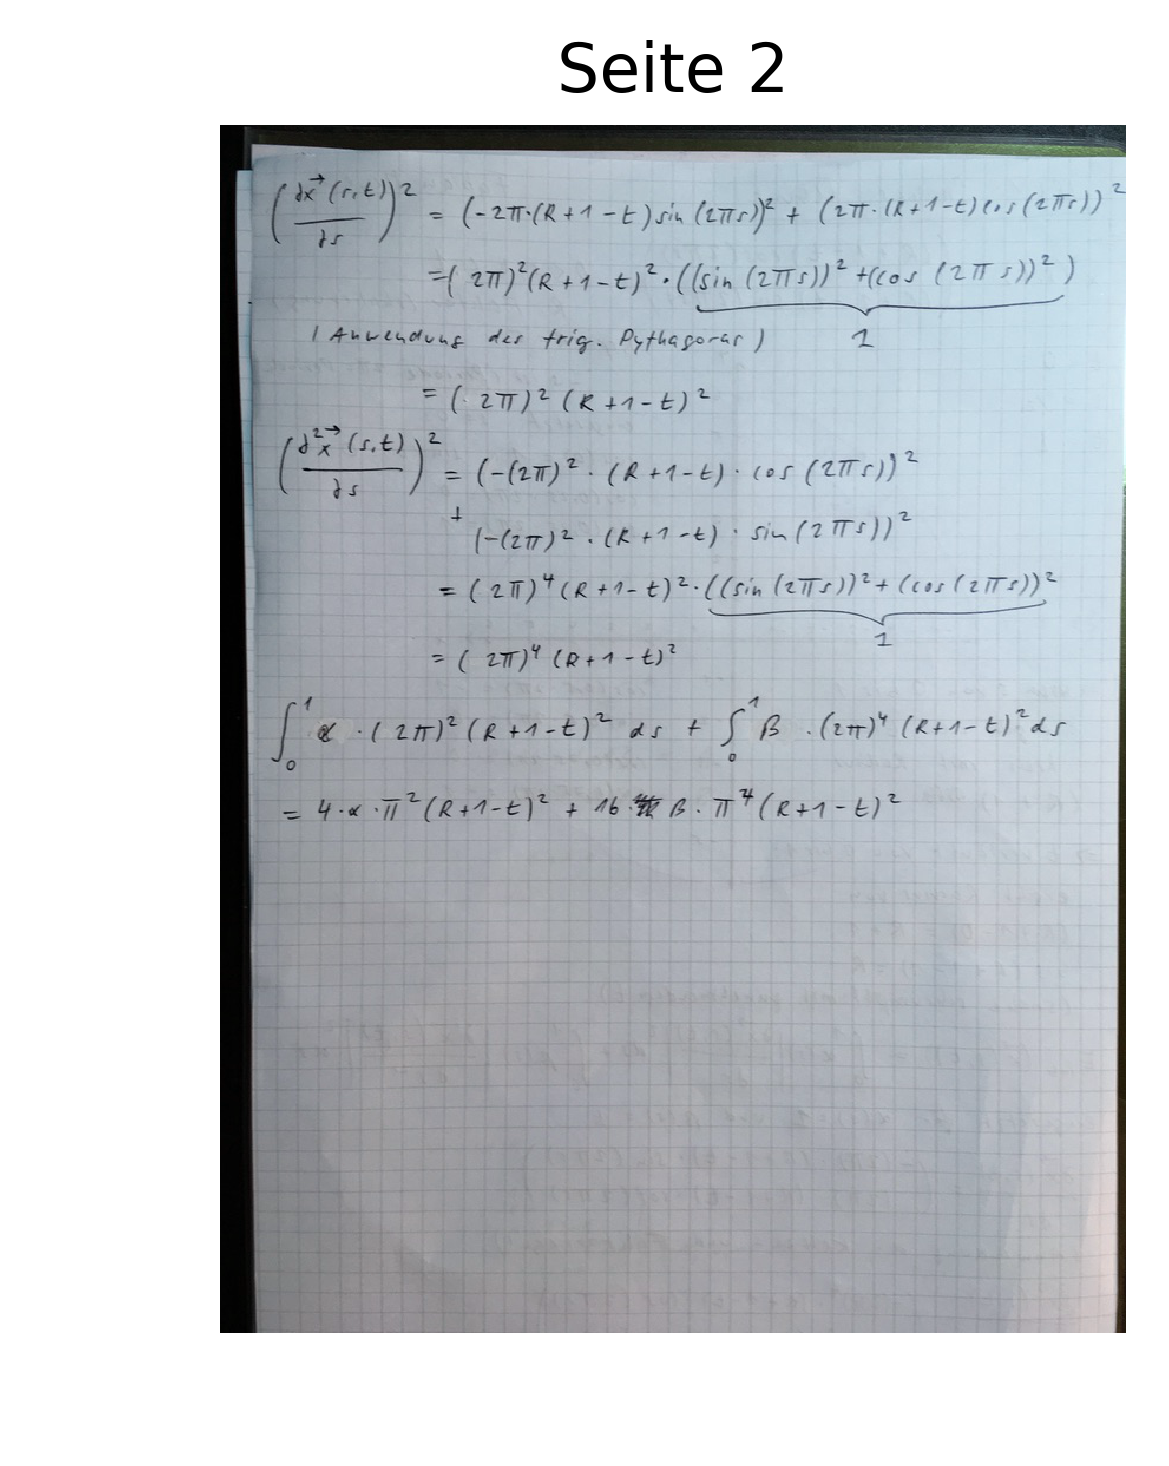

In [13]:
evo1 = cv2.imread('evolutioneinersnake2.jpg')
plt.imshow(evo1)
plt.title('Seite 2')
plt.axis('off')

## 2. Kantenbild

In [6]:
# OpenCV needs to be included first
import cv2
import numpy as np

# for displaying images in jupyter

import matplotlib as mpl
from matplotlib import pyplot as plt
%matplotlib inline
mpl.rcParams['figure.dpi']= 200

# PIL imports

import PIL
from PIL import Image
from PIL import ImageFilter
import PIL.ImageOps

### Bild laden und darstellen

### Blurring und Kanten berechnen

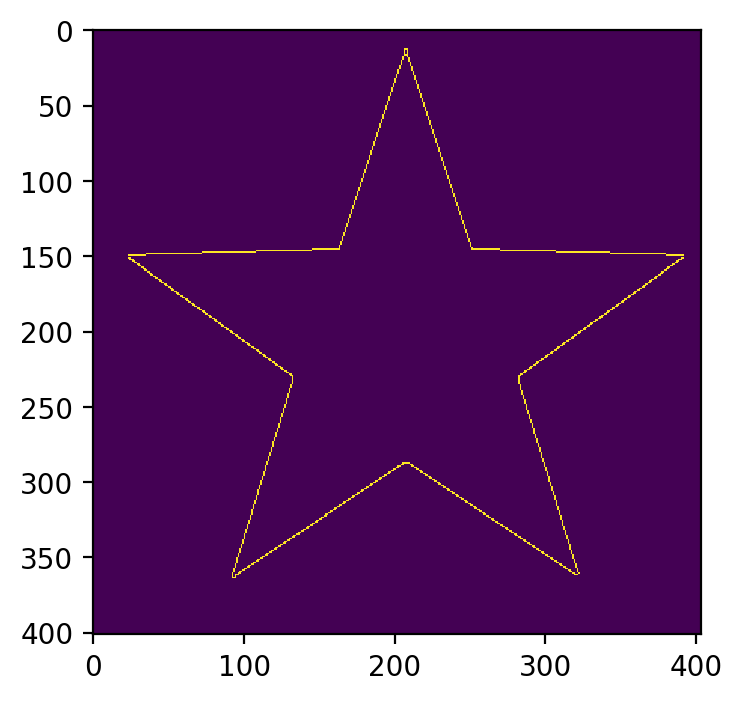

In [7]:
img = cv2.imread('testimage.png')
img_blurred = cv2.GaussianBlur(img, (3, 3), 0)
canny = cv2.Canny(img_blurred, 117, 137)

img_s = Image.fromarray(canny)
img_s.save("testimage2.png")

plt.imshow(canny)

### Image Gradient Vektor Feld (mithilfe PIL & Quiverplot)

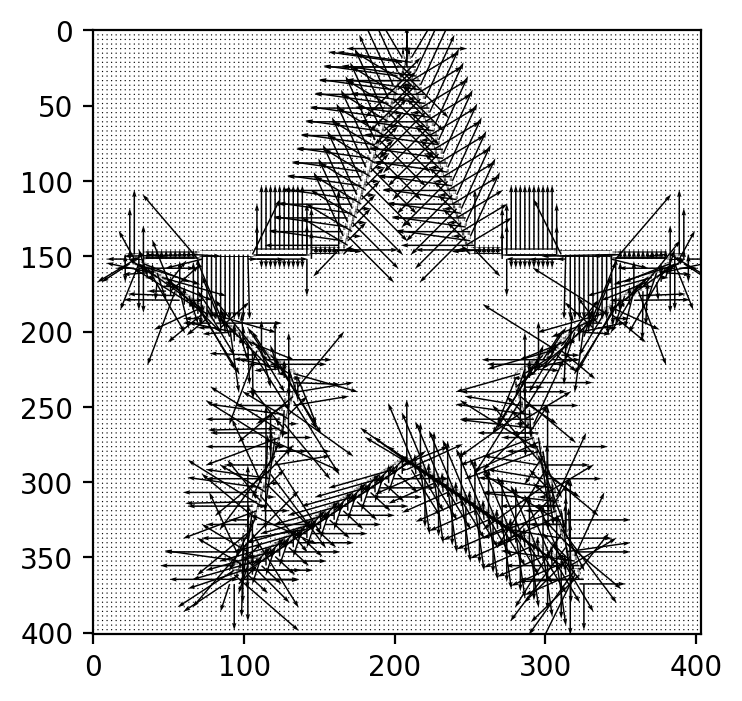

In [8]:
mpl.rcParams['figure.dpi']= 200

img = Image.open('testimage.png')
img = img.filter(ImageFilter.BLUR)
img = img.filter(ImageFilter.FIND_EDGES)
img = PIL.ImageOps.invert(img)

p = np.asarray(img).astype('int8')
w, h = img.size
x, y = np.mgrid[0:h:400j, 0:w:400j]

dy, dx = np.gradient(p)
skip = (slice(None, None, 3), slice(None, None, 3))

fig, ax = plt.subplots()
im = ax.imshow(img.transpose(Image.FLIP_TOP_BOTTOM), extent=[x.min(), x.max(), y.min(), y.max()])
ax.quiver(x[skip], y[skip], dx[skip].T, dy[skip].T)

ax.set(aspect=1)
ax.imshow(img, cmap=plt.cm.gray)

### Active Contour Model und Snake (mithilfe von Scikit-Image & active_contours)

[0, 404, 401, 0]

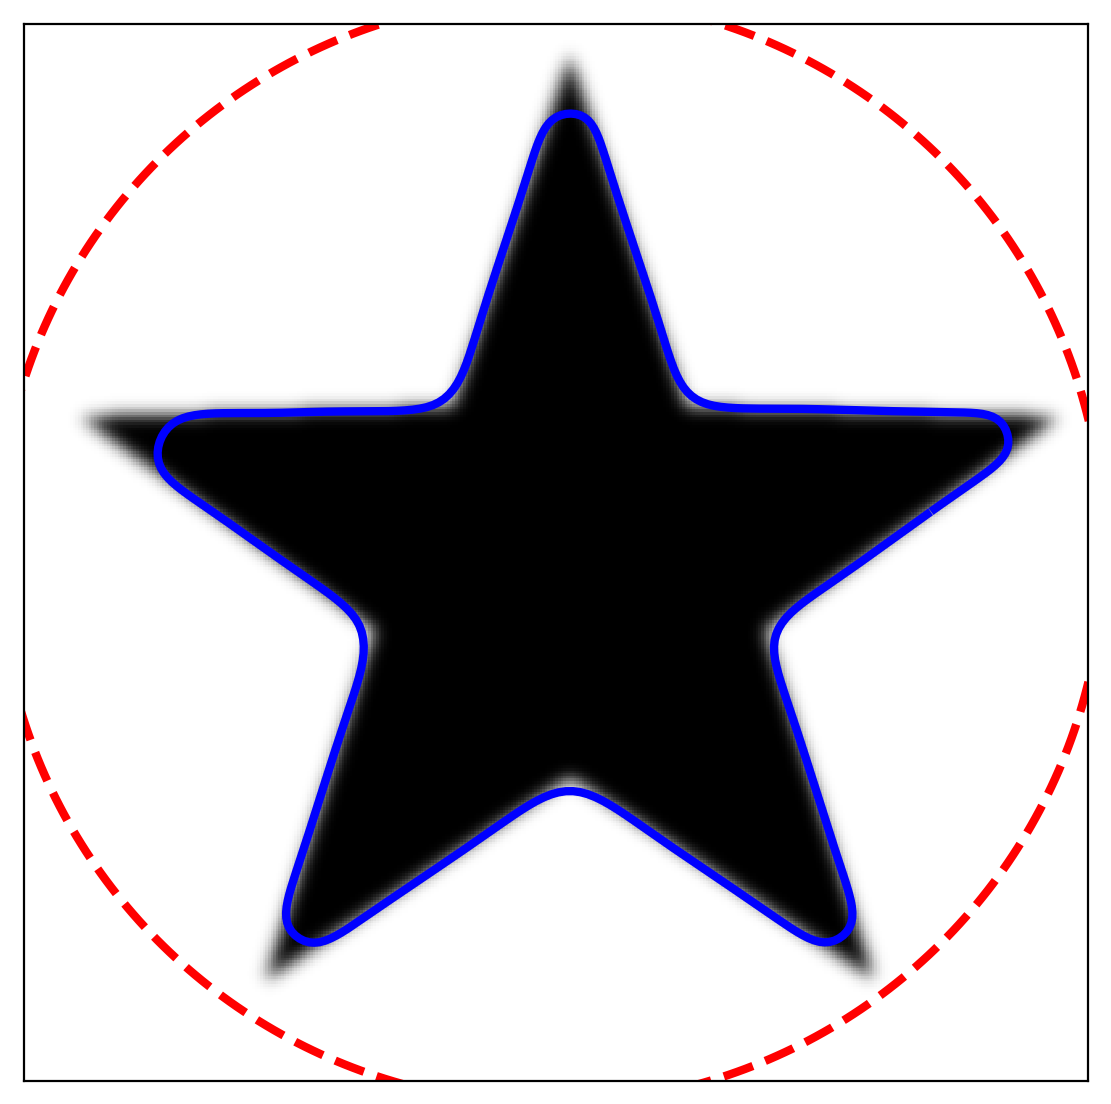

In [129]:
#Scikit-Image imports
import skimage
from skimage.color import rgb2gray
from skimage import data
from skimage.filters import gaussian
from skimage.segmentation import active_contour
from skimage import io
from skimage import filters
from skimage import img_as_float
from skimage import util

img = io.imread('testimage.png')
img = rgb2gray(img)
img = img_as_float(img)
img = filters.gaussian(img, 3)
img = util.invert(img)
#img = filters.laplace(img)

s = np.linspace(0, 2*np.pi, 400)
x = 200 + 210*np.cos(s)
y = 200 + 210*np.sin(s)
init = np.array([x, y]).T

snake = active_contour(img, init, alpha=0.0062, beta=1.25, gamma=0.005)

fig, ax = plt.subplots(figsize=(7, 7))
ax.imshow(img, cmap=plt.cm.gray)
ax.plot(init[:, 0], init[:, 1], '--r', lw=3)
ax.plot(snake[:, 0], snake[:, 1], '-b', lw=3)
ax.set_xticks([]), ax.set_yticks([])
ax.axis([0, img.shape[1], img.shape[0], 0])